In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='AppleGothic')
print(plt.rcParams['figure.dpi'])

100.0


In [3]:
df = pd.read_csv("data/ns_book.csv", low_memory=False)

df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [5]:
top30_pubs = df['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [8]:
top30_pubs_idx = df['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [9]:
sum(top30_pubs_idx)

51886

In [11]:
df1 = df[top30_pubs_idx].sample(1000, random_state=42)
df1.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


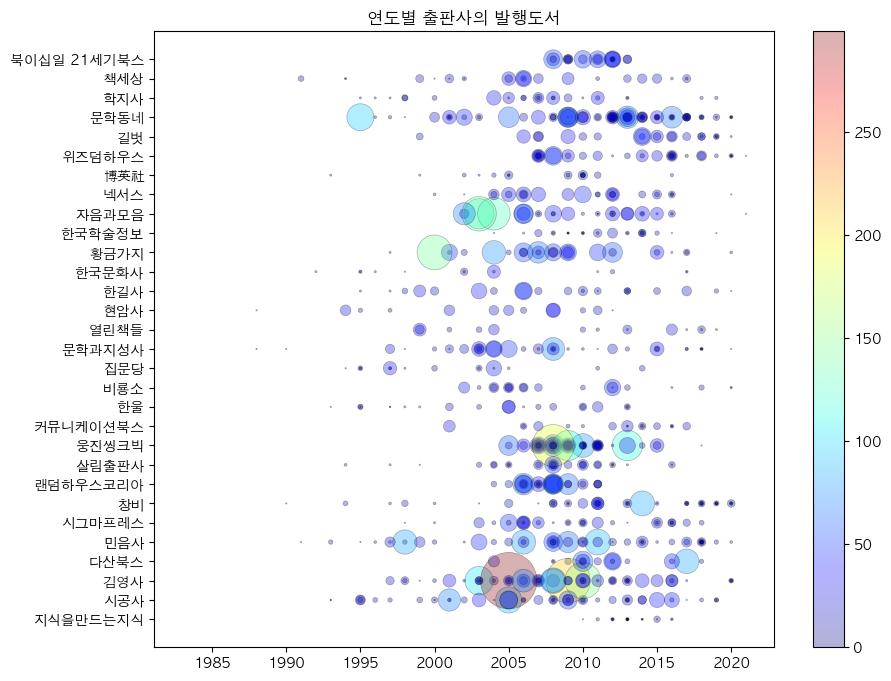

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter(
            df1['발행년도'], 
            df1['출판사'],
            s=df1['대출건수']**1.3,
            linewidths=0.5,
            edgecolors='k',
            c=df1['대출건수'],
            cmap='jet',
            alpha=0.3
        )
ax.set_title('연도별 출판사의 발행도서')
plt.colorbar(sc)
plt.show()